In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 

In [2]:
data = pd.read_csv('sensor.csv')

In [3]:
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [6]:
data.drop('sensor_15', axis=1, inplace=True)

In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'].dtype

dtype('<M8[ns]')

In [8]:
data.index = data['timestamp']
data.drop('timestamp', axis=1, inplace=True)

In [9]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [10]:
data.tail()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,15.01013,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [11]:
data.index.nunique()

220320

In [12]:
data['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [13]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [14]:
data.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [15]:
missing = pd.DataFrame(data.isnull().mean()*100, columns=['missing_%'])
missing.sort_values(by='missing_%', ascending=False)

,missing_%
sensor_50,34.956881
sensor_51,6.982117
sensor_00,4.633261
sensor_07,2.474129
sensor_08,2.317992
sensor_06,2.177741
sensor_09,2.085603
sensor_01,0.167484
sensor_30,0.118464
sensor_29,0.032680


In [16]:
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].median())

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       220320 non-null  float64
 1   sensor_01       220320 non-null  float64
 2   sensor_02       220320 non-null  float64
 3   sensor_03       220320 non-null  float64
 4   sensor_04       220320 non-null  float64
 5   sensor_05       220320 non-null  float64
 6   sensor_06       220320 non-null  float64
 7   sensor_07       220320 non-null  float64
 8   sensor_08       220320 non-null  float64
 9   sensor_09       220320 non-null  float64
 10  sensor_10       220320 non-null  float64
 11  sensor_11       220320 non-null  float64
 12  sensor_12       220320 non-null  float64
 13  sensor_13       220320 non-null  float64
 14  sensor_14       220320 non-null  float64
 15  sensor_16       220320 non-null  float64
 16  sensor_17       220320

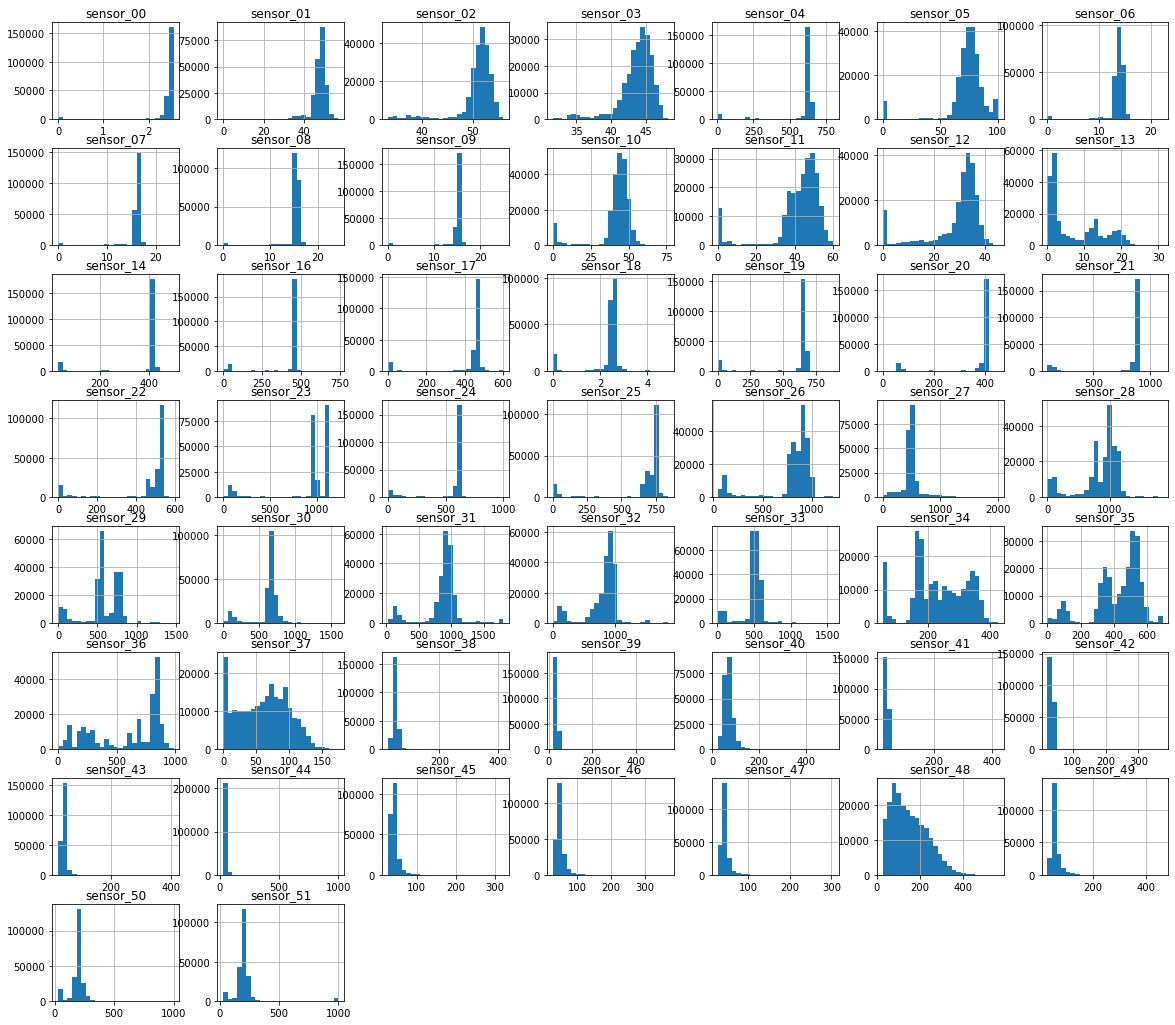

In [18]:
data.hist(bins=25, layout=(8,7), figsize=(20, 18))
plt.show()

In [19]:
df = data.drop('machine_status', axis=1)
status = data['machine_status']
broken = data[(data['machine_status']=='BROKEN')]
recovering = data[(data['machine_status']=='RECOVERING')]
normal = data[(data['machine_status']=='NORMAL')]

In [20]:
print("broken:{}".format(len(broken)))
print("recovering:{}".format(len(recovering)))
print("normal:{}".format(len(normal)))

broken:7
recovering:14477
normal:205836


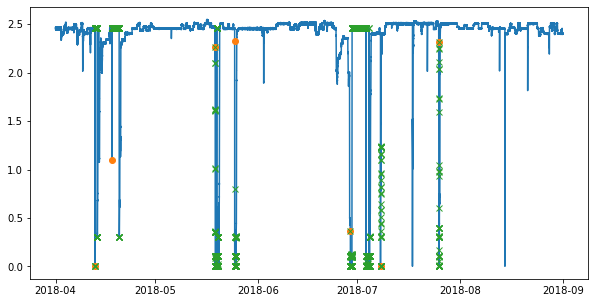

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_00'])
plt.plot(broken['sensor_00'], linestyle='none', marker = 'o')
plt.plot(recovering['sensor_00'], linestyle='none', marker = 'x')

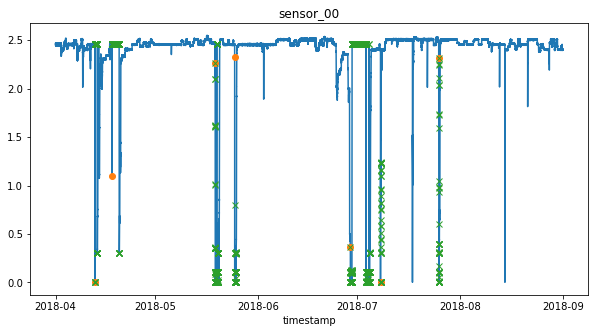

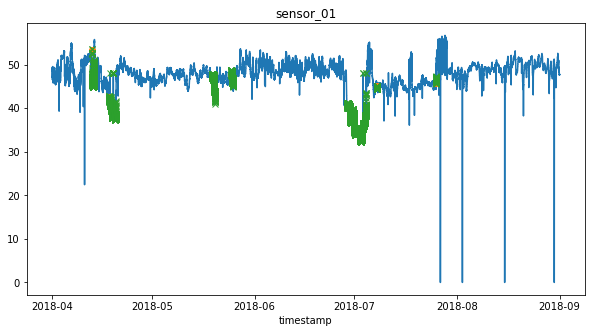

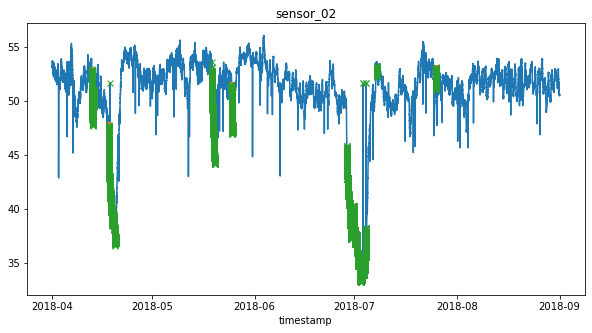

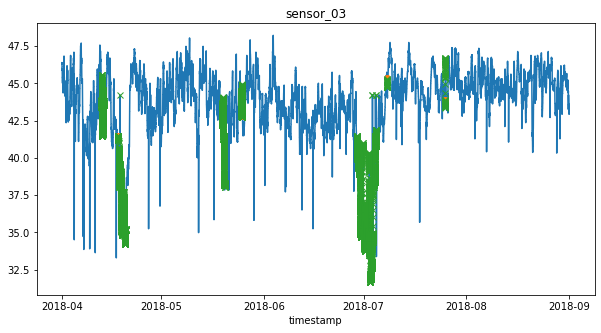

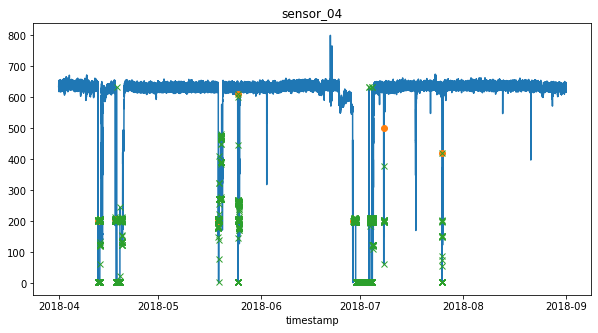

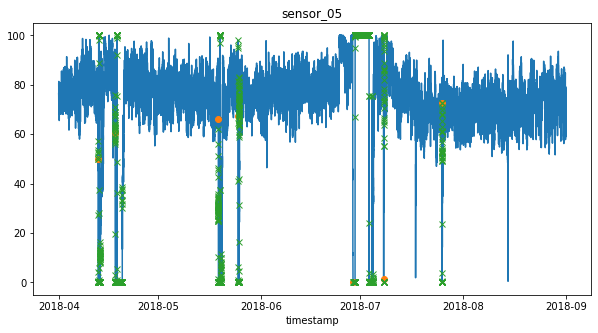

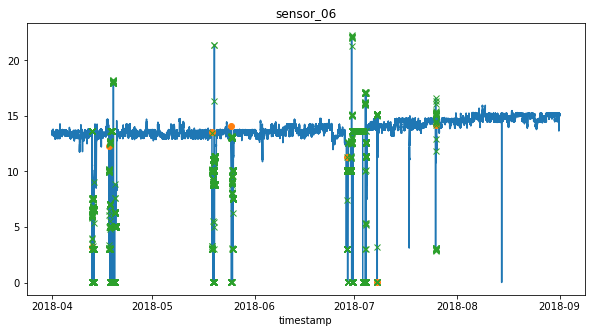

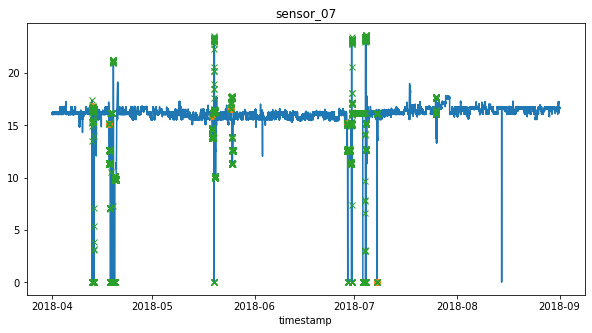

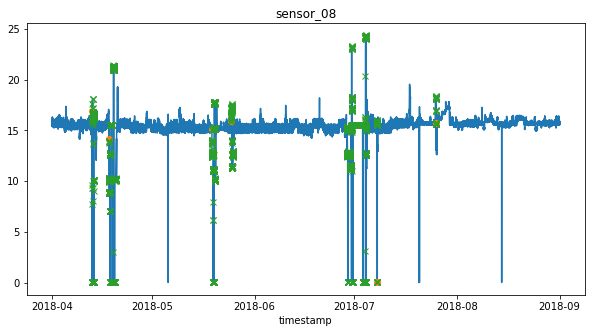

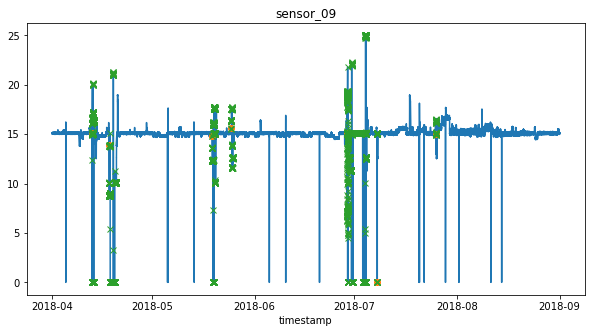

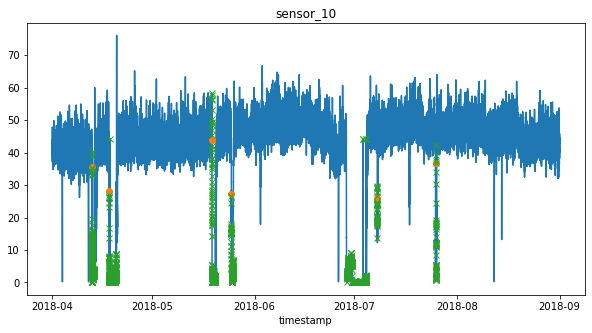

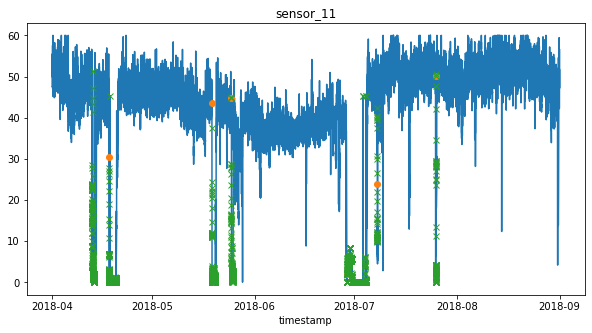

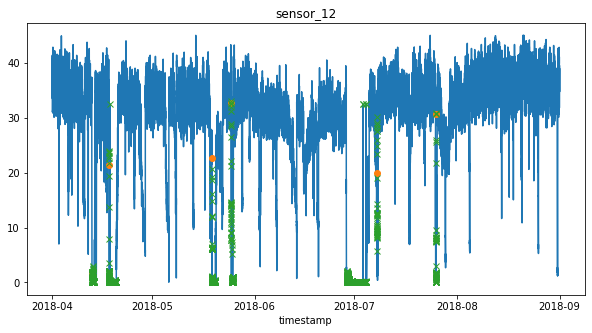

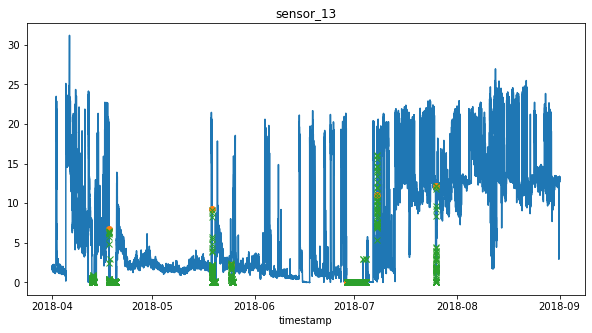

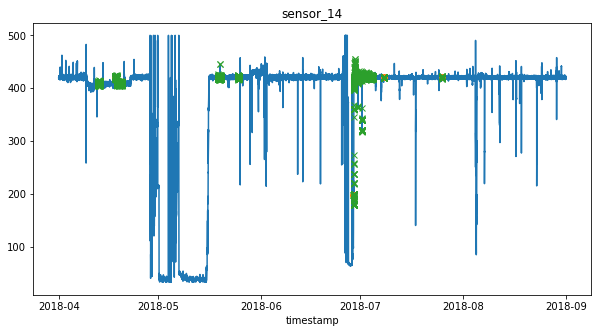

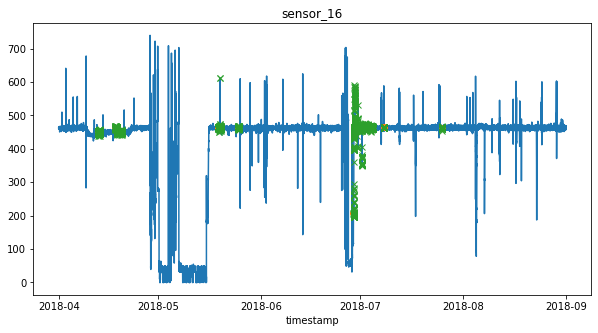

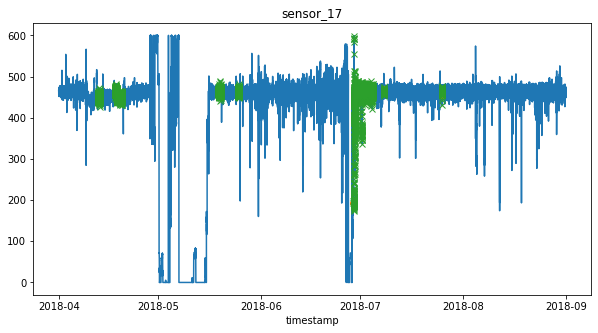

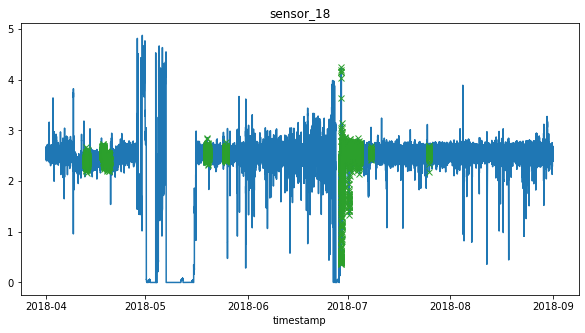

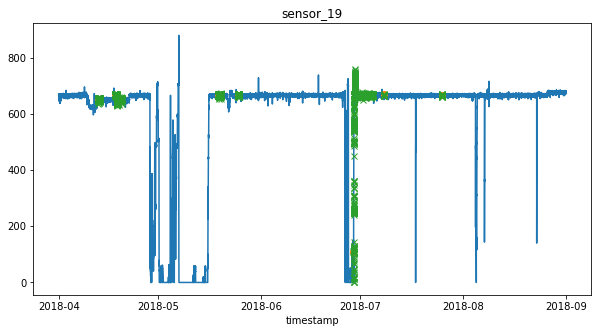

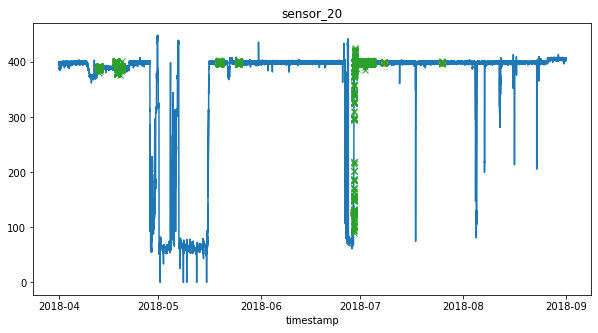

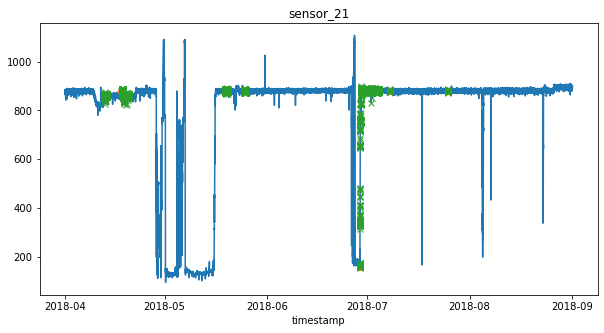

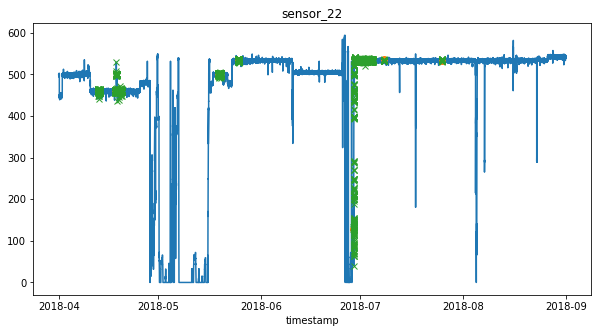

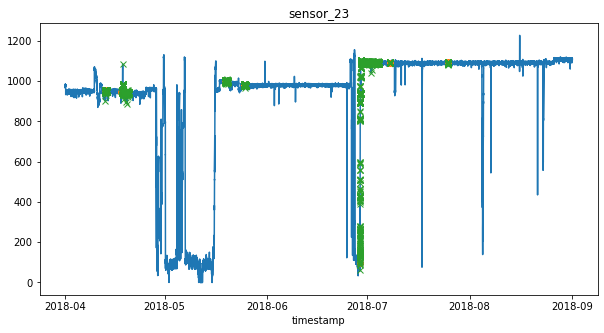

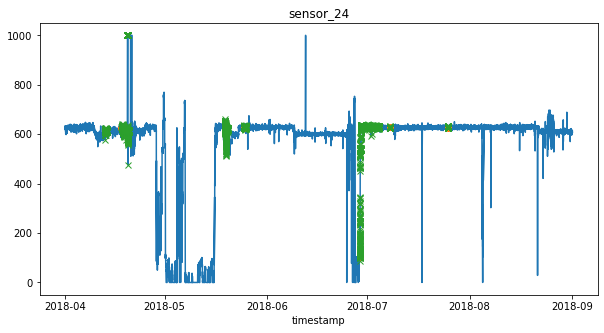

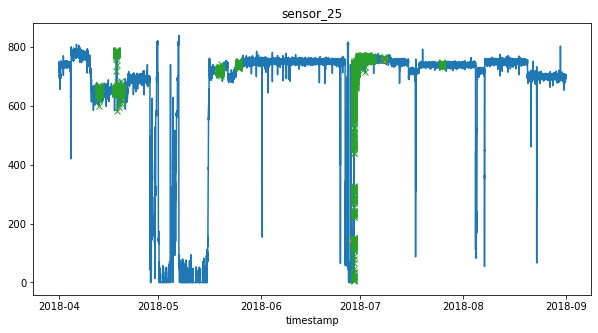

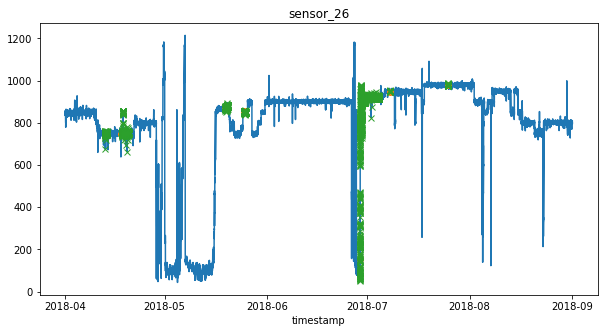

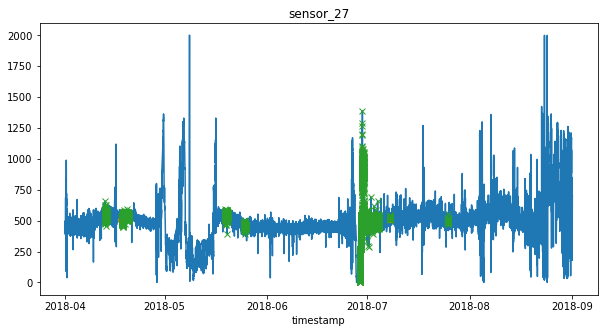

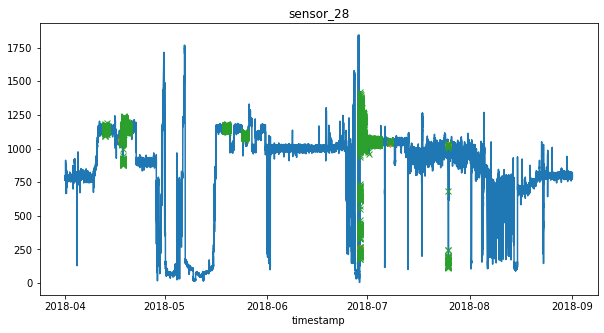

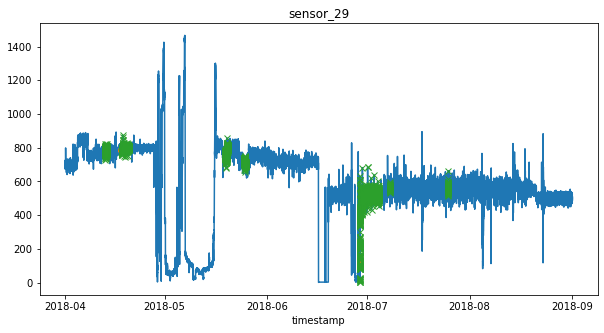

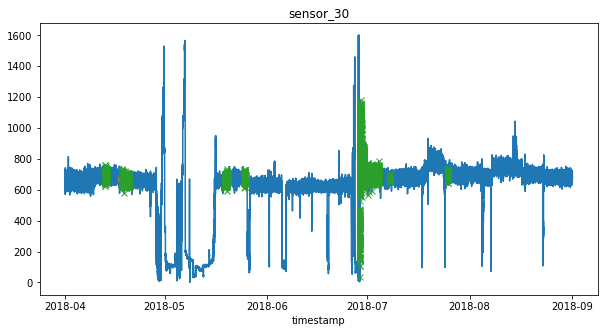

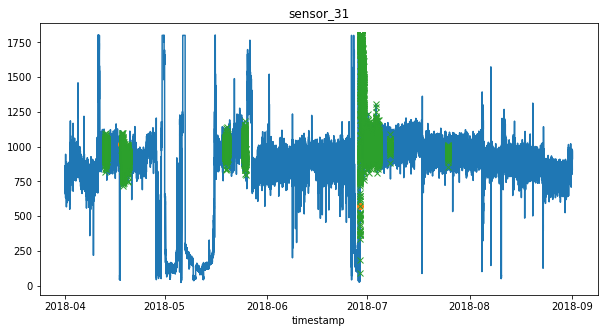

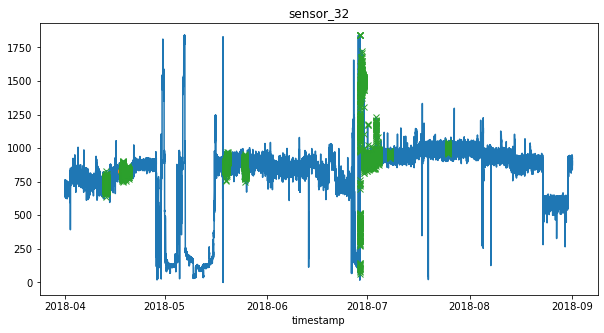

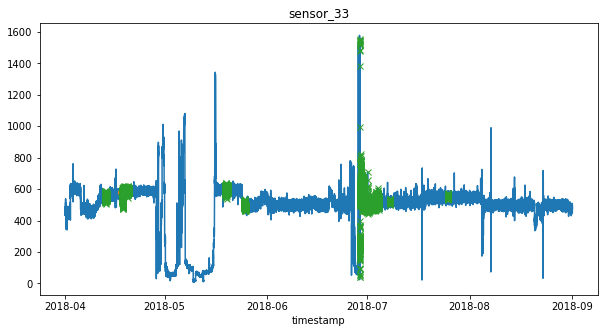

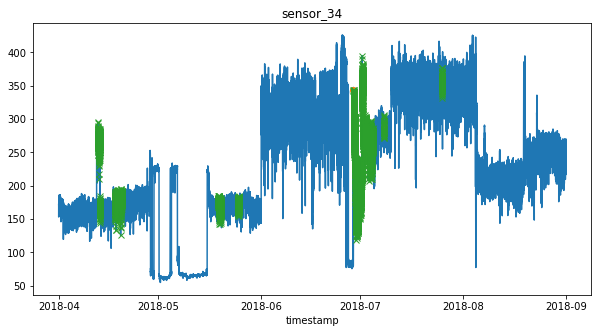

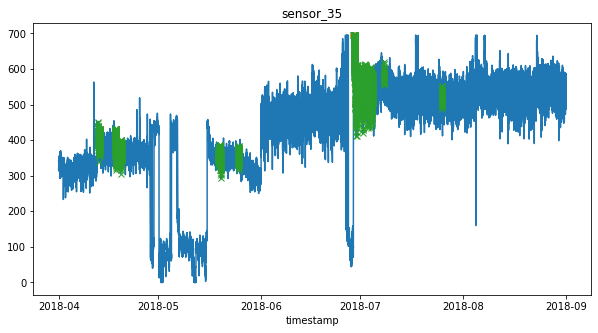

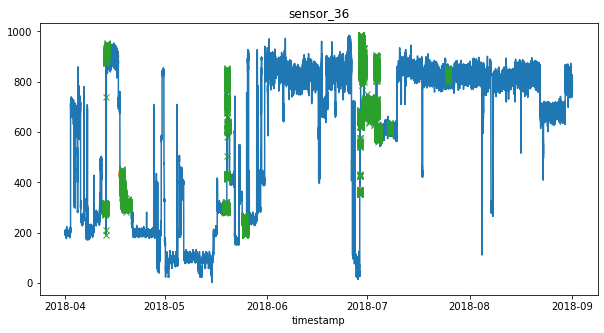

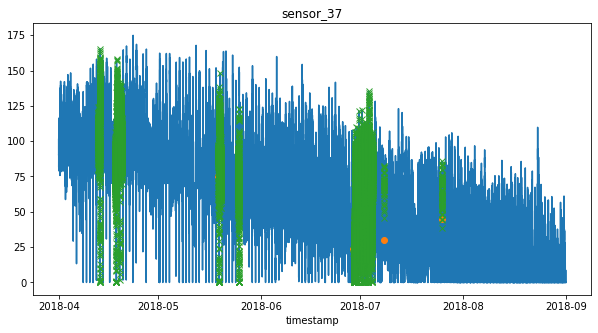

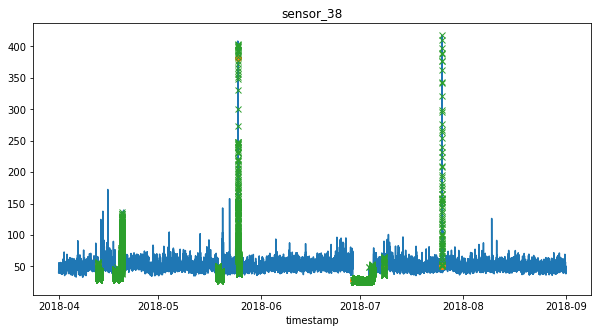

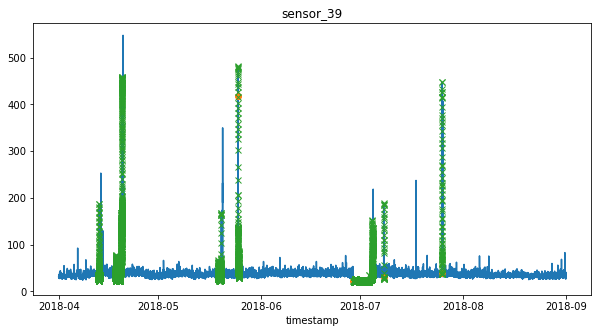

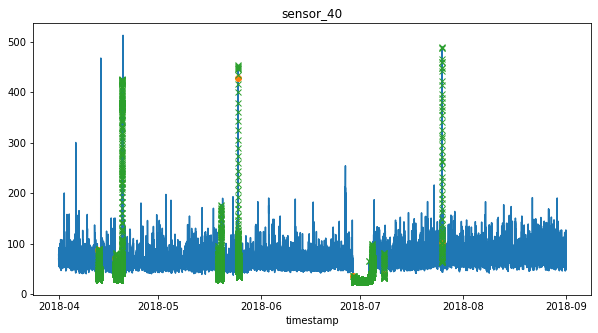

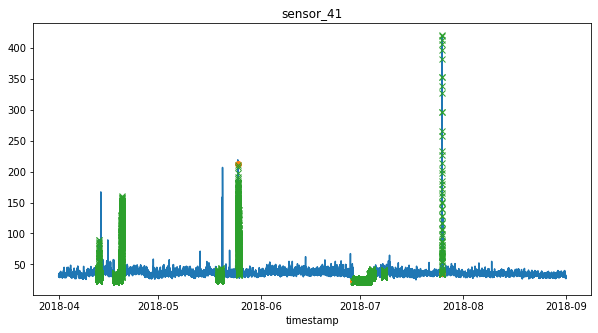

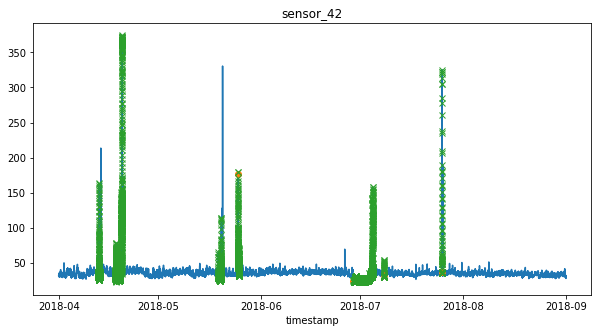

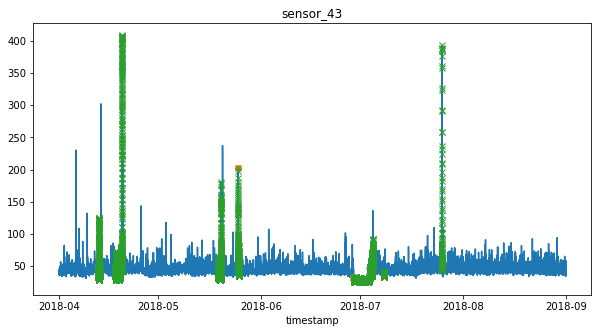

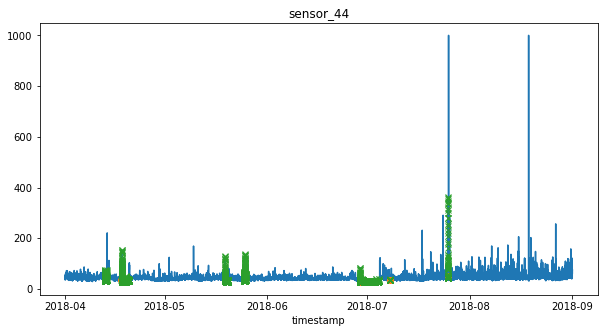

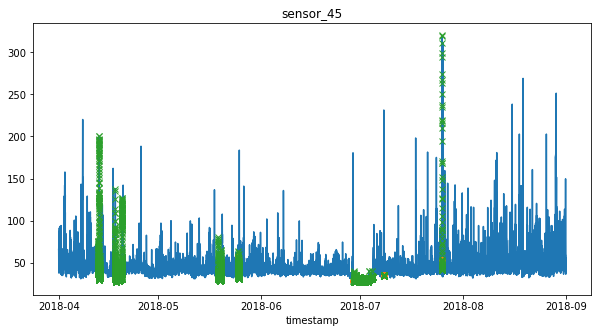

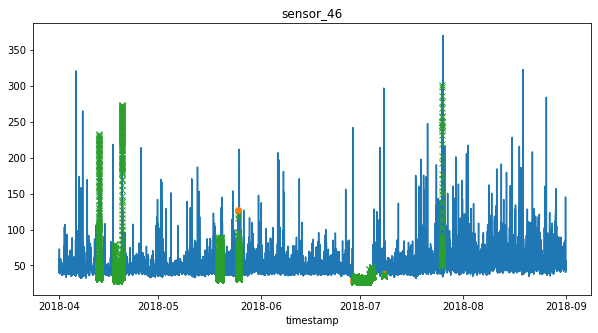

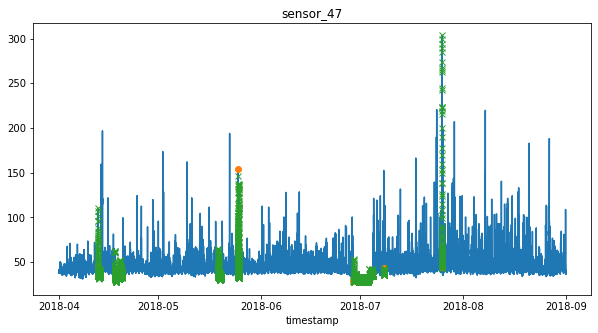

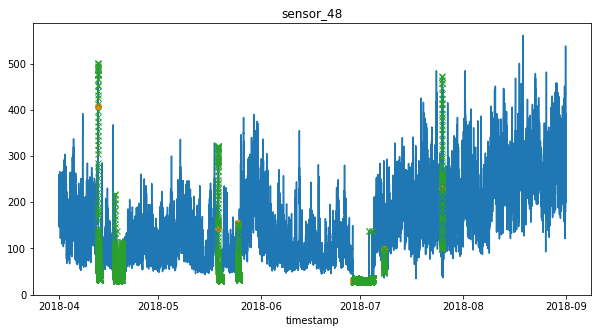

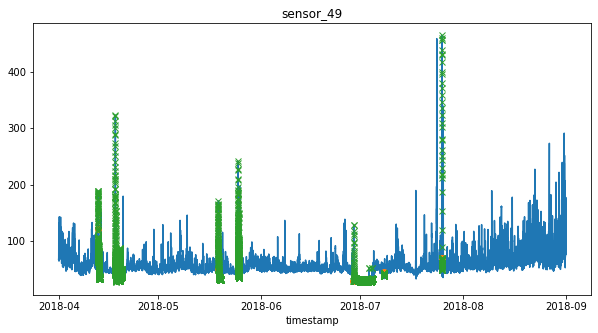

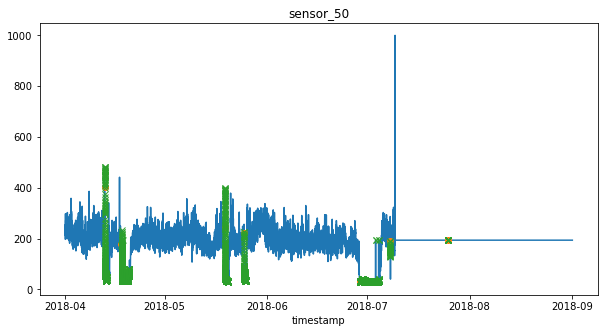

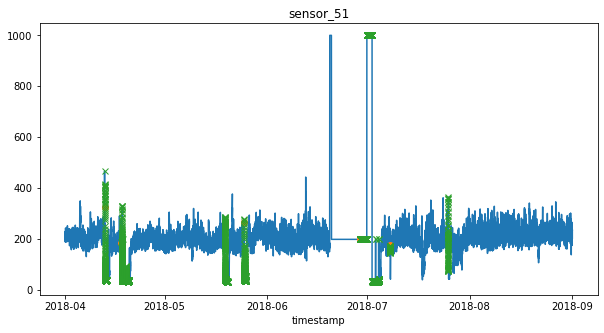

In [22]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(data[col])
    plt.plot(broken[col], linestyle='none', marker = 'o')
    plt.plot(recovering[col], linestyle='none', marker = 'x')
    plt.title(col)
    plt.xlabel('timestamp')
    plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

In [25]:
principal_df = pd.DataFrame(principal_components, columns = ['PC1', 'PC2'])

In [29]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))
principal_df = pd.DataFrame(minmax.fit_transform(principal_df))

In [30]:
principal_df.columns = ['PC1', 'PC2']
principal_df.head()

,PC1,PC2
0,0.340436,0.491181
1,0.340436,0.491181
2,0.333497,0.491316
3,0.333470,0.492209
4,0.335694,0.495315


In [31]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.sum()))

Explained variation per principal component: 0.5353958855156059


In [32]:
data['PC1'] = pd.Series(principal_df['PC1'].values, index=data.index)
data['PC2'] = pd.Series(principal_df['PC2'].values, index=data.index)

In [33]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,PC1,PC2
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0.340436,0.491181
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,0.340436,0.491181
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,0.333497,0.491316
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,0.333470,0.492209
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,0.335694,0.495315


In [34]:
q1_pc1, q3_pc1 = data['PC1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

q1_pc2, q3_pc2 = data['PC2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [35]:
data['anomaly_pc1'] = ((data['PC1']>upper_pc1) | (data['PC1']<lower_pc1)).astype('int')
data['anomaly_pc2'] = ((data['PC2']>upper_pc2) | (data['PC2']<lower_pc2)).astype('int')

In [36]:
data['anomaly_pc1'].value_counts(normalize=True)

0    0.870597
1    0.129403
Name: anomaly_pc1, dtype: float64

In [37]:
data['anomaly_pc2'].value_counts(normalize=True)

0    0.918187
1    0.081813
Name: anomaly_pc2, dtype: float64

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X = data.drop(['machine_status', 'PC1', 'PC2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = data['machine_status']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X_scaled, y)

In [39]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(5, 'Score'))

      Feature         Score
11  sensor_11  10122.905617
12  sensor_12   9892.421019
4   sensor_04   8183.104338
10  sensor_10   7769.814823
2   sensor_02   4579.277825


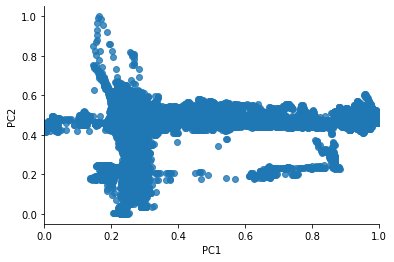

In [40]:
sns.regplot(x="PC1", y="PC2", data=principal_df)
sns.despine();

## KMeans

In [41]:
from sklearn.cluster import KMeans
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(principal_df) for i in n_cluster]
scores = [kmeans[i].score(principal_df) for i in range(len(kmeans))]

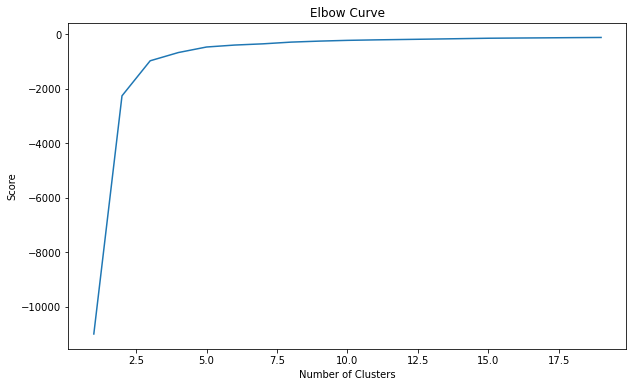

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

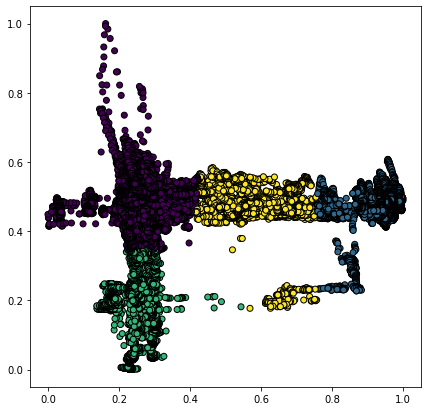

In [43]:
km = KMeans(n_clusters=4)
km.fit(principal_df)
km.predict(principal_df)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))

plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=labels.astype(np.float), edgecolor="k")

In [44]:
def getDistanceByPoint(data, model):
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=df.index)

In [45]:
outliers_fraction = 0.01
distance = getDistanceByPoint(principal_df, km)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()

In [46]:
anomaly1 = pd.DataFrame((distance >= threshold).astype(int))

In [47]:
data['anomaly1'] = anomaly1.values

In [48]:
data['anomaly1'].value_counts(normalize=True)

0    0.990001
1    0.009999
Name: anomaly1, dtype: float64

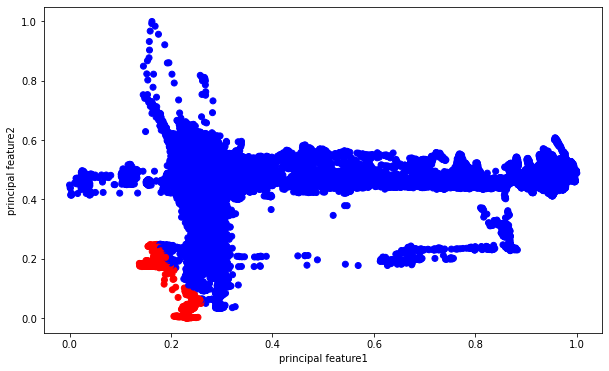

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(principal_df['PC1'], principal_df['PC2'], c=data["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

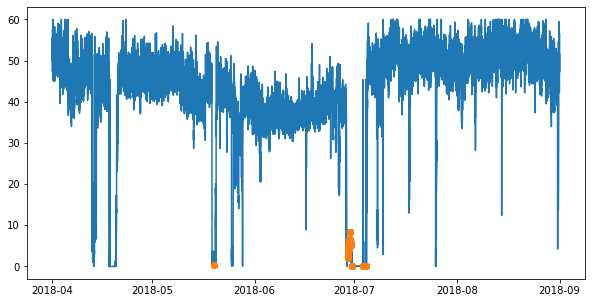

In [50]:
anomaly = data[data['anomaly1']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_11'])
plt.plot(anomaly['sensor_11'], linestyle='none', marker = 'o')

In [51]:
data[data['anomaly1']==1]['machine_status'].value_counts()

RECOVERING    2203
Name: machine_status, dtype: int64

In [52]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

## Isolation Forest

In [53]:
from sklearn.ensemble import IsolationForest
outliers_fraction = 0.01
iso_for =  IsolationForest(contamination=outliers_fraction)
iso_for.fit(principal_df.values) 
anomaly2 = pd.DataFrame(iso_for.predict(principal_df.values))

In [54]:
data['anomaly2'] = anomaly2.values
data['anomaly2'] = data['anomaly2'].map( {1: 0, -1: 1} )

In [55]:
data['anomaly2'].value_counts()

0    218117
1      2203
Name: anomaly2, dtype: int64

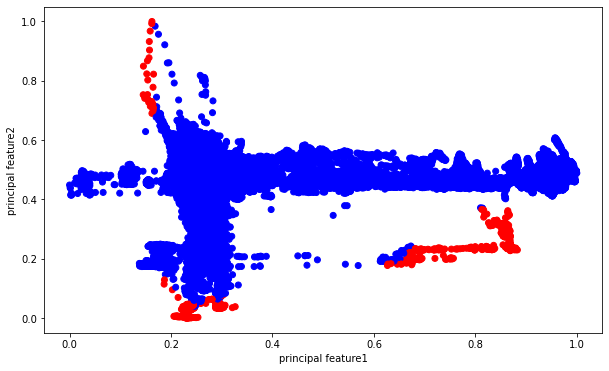

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(principal_df['PC1'], principal_df['PC2'], c=data["anomaly2"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

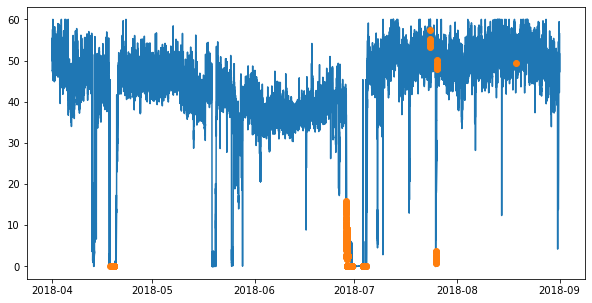

In [57]:
anomaly = data[data['anomaly2']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_11'])
plt.plot(anomaly['sensor_11'], linestyle='none', marker = 'o')

In [58]:
data[data['anomaly2']==1]['machine_status'].value_counts()

RECOVERING    1843
NORMAL         359
BROKEN           1
Name: machine_status, dtype: int64

In [59]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

## One class SVM

In [60]:
from sklearn.svm import OneClassSVM
outliers_fraction = 0.01
svm =  OneClassSVM(nu=0.95 * outliers_fraction)
svm.fit(principal_df.values)
anomaly3 = pd.Series(svm.predict(principal_df.values))

In [61]:
data['anomaly3'] = anomaly3.values
data['anomaly3'] = data['anomaly3'].map( {1: 0, -1: 1} )

In [62]:
data['anomaly3'].value_counts(normalize=True)

0    0.990491
1    0.009509
Name: anomaly3, dtype: float64

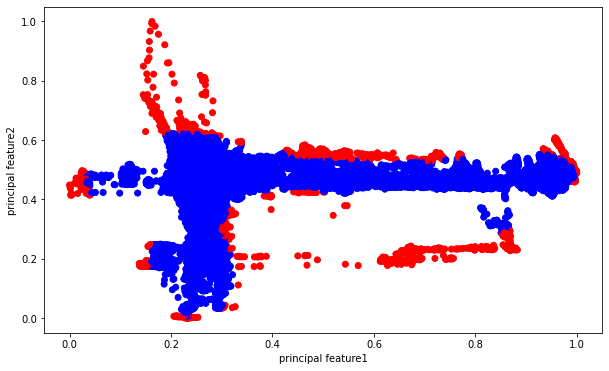

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(principal_df['PC1'], principal_df['PC2'], c=data["anomaly3"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

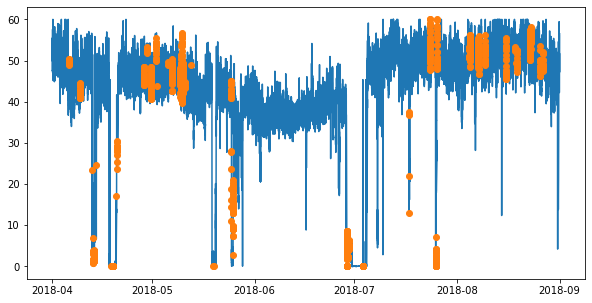

In [64]:
anomaly = data[data['anomaly3']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_11'])
plt.plot(anomaly['sensor_11'], linestyle='none', marker = 'o')

In [65]:
data[data['anomaly3']==1]['machine_status'].value_counts()

NORMAL        1468
RECOVERING     625
BROKEN           2
Name: machine_status, dtype: int64

## Elliptic Envelope

In [66]:
outliers_fraction = 0.01

In [67]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=outliers_fraction)
ee.fit(principal_df.values)
anomaly4 = pd.Series(ee.predict(principal_df.values))

In [68]:
data['anomaly4'] = anomaly3.values
data['anomaly4'] = data['anomaly4'].map( {1: 0, -1: 1} )

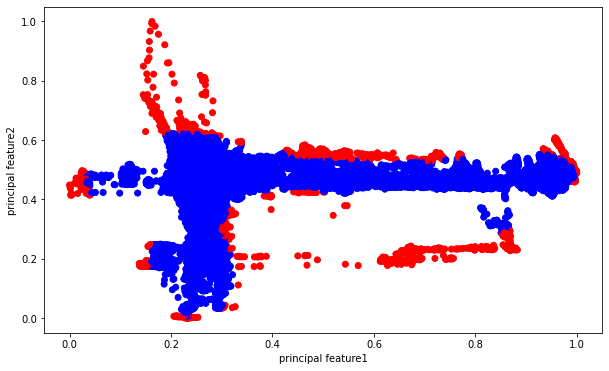

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(principal_df['PC1'], principal_df['PC2'], c=data["anomaly4"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

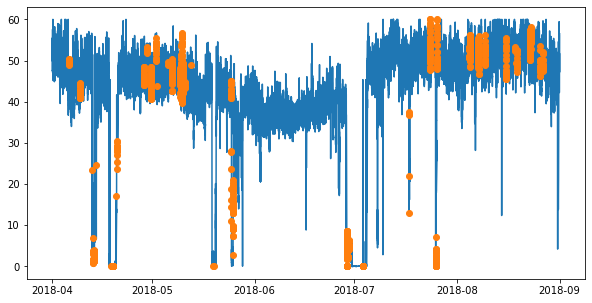

In [70]:
anomaly = data[data['anomaly4']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_11'])
plt.plot(anomaly['sensor_11'], linestyle='none', marker = 'o')

## Local Outlier Factor

In [71]:
from sklearn.neighbors import LocalOutlierFactor

In [117]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(principal_df.values)
anomaly5 = pd.Series(lof.predict(principal_df.values))

In [118]:
data['anomaly5'] = anomaly3.values
data['anomaly5'] = data['anomaly5'].map( {1: 0, -1: 1} )

In [119]:
data['anomaly5'].value_counts()

0    218225
1      2095
Name: anomaly5, dtype: int64

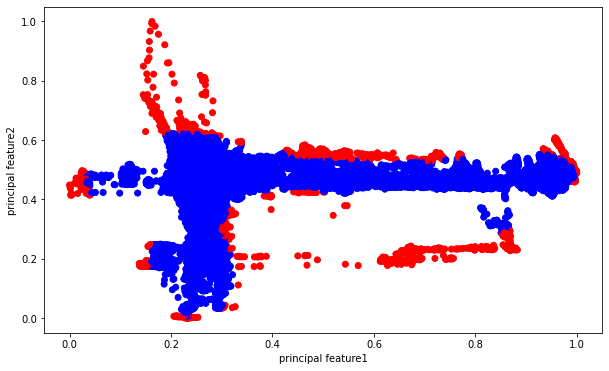

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(principal_df['PC1'], principal_df['PC2'], c=data["anomaly5"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

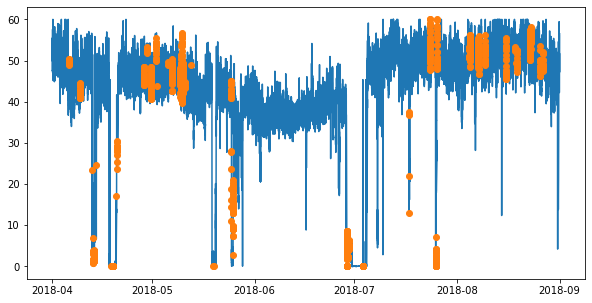

In [76]:
anomaly = data[data['anomaly5']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_11'])
plt.plot(anomaly['sensor_11'], linestyle='none', marker = 'o')

## Cluster-based Local Outlier Factor

In [77]:
from pyod.models.cblof import CBLOF

outliers_fraction = 0.01
cblof = CBLOF(contamination=outliers_fraction)
cblof.fit(principal_df.values) 
anomaly6 = pd.Series(cblof.predict(principal_df.values))

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [78]:
data['anomaly6'] = anomaly3.values
data['anomaly6'] = data['anomaly6'].map( {1: 0, -1: 1} )

In [79]:
data['anomaly6'].value_counts()

0    218225
1      2095
Name: anomaly6, dtype: int64

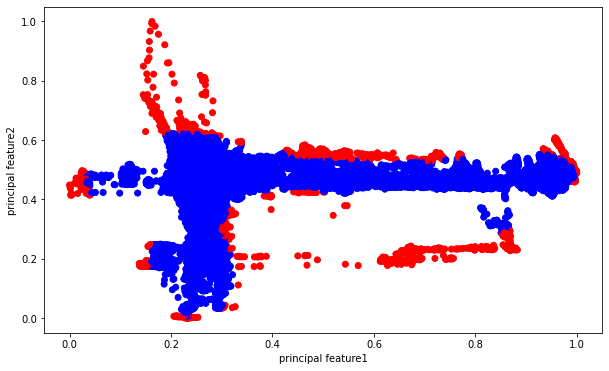

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(principal_df['PC1'], principal_df['PC2'], c=data["anomaly6"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

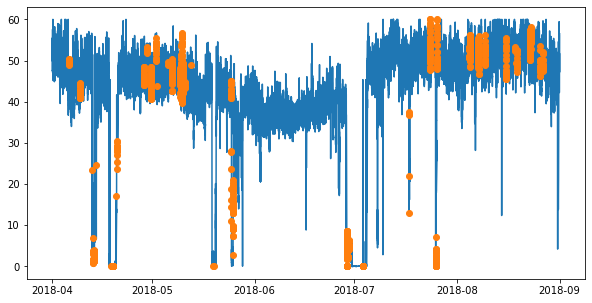

In [81]:
anomaly = data[data['anomaly6']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_11'])
plt.plot(anomaly['sensor_11'], linestyle='none', marker = 'o')

In [82]:
data[data['anomaly6']==1]['machine_status'].value_counts()

NORMAL        1468
RECOVERING     625
BROKEN           2
Name: machine_status, dtype: int64

In [83]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [84]:
from pyod.models import auto_encoder

ae_model = auto_encoder.AutoEncoder(hidden_neurons=[2, 32, 32, 2], 
                                    hidden_activation='relu',
                                    output_activation='sigmoid',
                                    epochs=100,
                                    batch_size=32,
                                    contamination=0.01)

In [85]:
ae_model.fit(principal_df.values)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dropout (Dropout)            (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                9

Epoch 60/100
6197/6197 [==============================] - 7s 1ms/step - loss: 0.9093 - val_loss: 0.7642
Epoch 61/100
6197/6197 [==============================] - 8s 1ms/step - loss: 0.9025 - val_loss: 0.7616
Epoch 62/100
6197/6197 [==============================] - 7s 1ms/step - loss: 0.9074 - val_loss: 0.7798
Epoch 63/100
6197/6197 [==============================] - 7s 1ms/step - loss: 0.9099 - val_loss: 0.7722
Epoch 64/100
6197/6197 [==============================] - 11s 2ms/step - loss: 0.9129 - val_loss: 0.7630
Epoch 65/100
6197/6197 [==============================] - 9s 1ms/step - loss: 0.9021 - val_loss: 0.7795
Epoch 66/100
6197/6197 [==============================] - 9s 1ms/step - loss: 0.9057 - val_loss: 0.7627
Epoch 67/100
6197/6197 [==============================] - 8s 1ms/step - loss: 0.8975 - val_loss: 0.7648
Epoch 68/100
6197/6197 [==============================] - 9s 2ms/step - loss: 0.9165 - val_loss: 0.7562
Epoch 69/100
6197/6197 [==============================] - 8s 1m

AutoEncoder(batch_size=32, contamination=0.01, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 32, 32, 2],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7feb68b685e0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [90]:
anomaly7 = pd.Series(ae_model.predict(principal_df.values))

In [91]:
data['anomaly7'] = anomaly7.values
data['anomaly7'] = data['anomaly7']

In [92]:
data['anomaly7'].value_counts()

0    218116
1      2204
Name: anomaly7, dtype: int64

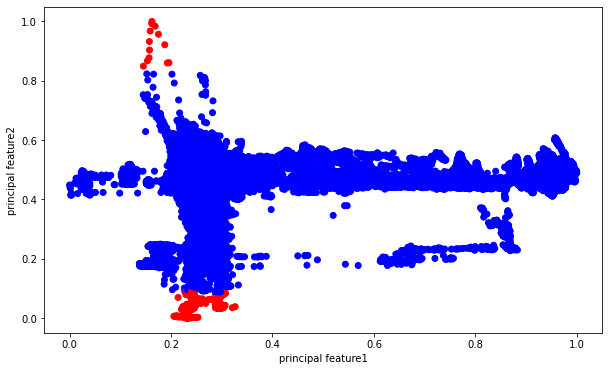

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(principal_df['PC1'], principal_df['PC2'], c=data["anomaly7"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

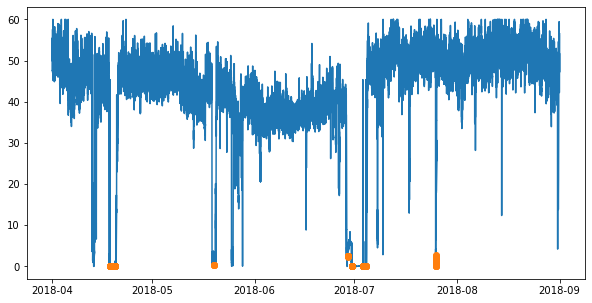

In [94]:
anomaly = data[data['anomaly7']==1]
plt.figure(figsize=(10, 5))
plt.plot(data['sensor_11'])
plt.plot(anomaly['sensor_11'], linestyle='none', marker = 'o')